<a href="https://colab.research.google.com/github/spicasso/GERGM/blob/master/trabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO FINAL AA PARA DATOS EN GRAFOS - LEZCANO Y PICASSO**

In [ ]:
# Instalo graspologic. Es una biblioteca que nos va a servir para más adelante,
# ahora solo vamos a utilizar un método muy útil que tiene (es como matar una
# mosca con un cañón, pero bueno)
# Antes instalo versiones otras versiones de scipy, networkx y gensim porque las
# que trae Colab rompen graspologic
!pip install --upgrade scipy
!pip install networkx==2.8.5
!pip install gensim==4.2.0
!pip install psutil==5.9.4
!pip install graspologic==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 KB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.5/754.5 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.3 MB/s eta 0:00:00
  

In [ ]:
# Importo PyTorch
import torch

In [ ]:
# Instalo versión de PyTorch Geometric según instalación de PyTorch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=1480db4862cd20b7c0def48cdbf3b3d01d55f6a799897d2aef47678363d40bf9
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully b

IMPORTANTE: reiniciar runtime
Luego de instalar los paquetes de la celda anterior, se debe reiniciar el Runtime de Colab (Menú Runtime -> Restart runtime). De lo contrario la celda de abajo da un error. (Reiniciar entorno de ejecución)

In [ ]:
# Importo librerías y funciones
import numpy as np
import numpy.linalg as la
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
import sys
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV
from graspologic.utils import remap_labels
#import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
senales = pd.read_csv('/content/drive/MyDrive/AA de datos en grafos/Trabajo final/Bases/Señales/base_WB_pwt90_VDem_colapsa.csv')
datos_e = pd.read_csv('/content/drive/MyDrive/AA de datos en grafos/Trabajo final/Bases/Datos/datos_emi.csv', sep=';')
datos_i = pd.read_csv('/content/drive/MyDrive/AA de datos en grafos/Trabajo final/Bases/Datos/datos_inmi.csv', sep=';')

In [ ]:
senales.head()

country_name    colapsa countrycode  v2x_libdem  v2julanguage  v2pepwrsoc  \
0    Argentina  2000-2015         ARG    0.615437           NaN    1.457937   
1      Bolivia  2000-2015         BOL    0.463438      2.000000    0.725812   
2       Brazil  2000-2015         BRA    0.751875     50.142857    1.510875   
3        Chile  2000-2015         CHL    0.827875      1.818182    0.916687   
4     Colombia  2000-2015         COL    0.468937      1.600000    0.243563   

   v2pepwrgen  v2peedueq  v2pehealth  v2peapsecon  ...        a66        a67  \
0    1.862750   0.687062    0.950750     0.532937  ...  14.791000  12.447143   
1    0.761750  -0.864188   -0.349125     0.076500  ...   5.793571   4.562143   
2    1.700250  -0.672125    0.090313    -0.396563  ...  12.757143  11.757143   
3    1.469188  -0.582813    0.341063     0.647125  ...  15.020000  10.623750   
4    0.963688  -0.518875    0.259875    -0.113000  ...  15.543846  14.969333   

         a68        a69       a70        a71        a72        a73        a74  \
0  12.104187  10.090000  9.703188  10.921333  10.708812  10.465000  75.433000   
1   3.069125   3.095000  2.099688   3.752143   2.514812   7.803333  65.159687   
2  10.794312   7.012143  6.567562   9.067143   8.343437  28.571095  72.290250   
3  10.615563   7.638750  7.634062   8.755000   8.760625        NaN  78.288187   
4  15.005812   9.368000  9.334938  11.726667  11.695625  15.107500  73.957312   

            a75  
0  4.003453e+07  
1  9.813483e+06  
2  1.912742e+08  
3  1.659585e+07  
4  4.341161e+07  

[5 rows x 139 columns]

In [ ]:
del datos_e["country"] #datos_e = datos_e.iloc[:, 1:19]
del datos_i["country"] #datos_i = datos_i.iloc[:, 1:19]
#datos_e = datos_e.fillna(0) # hecho en R
#datos_i = datos_i.fillna(0) # hecho en R

In [ ]:
latam = {0 : 'Argentina', 1 : 'Bolivia', 2 : 'Brazil', 3 : 'Chile', 4 : 'Colombia', 5 : 'Costa Rica',
       6 : 'Ecuador', 7 : 'El Salvador', 8 : 'Guatemala', 9 : 'Guyana', 10 : 'Honduras', 11 : 'Mexico',
       12 : 'Nicaragua', 13 : 'Panama', 14 : 'Paraguay', 15 : 'Peru', 16 : 'Suriname', 17 : 'Uruguay', 18 : 'Venezuela'}
print(type(latam))
#datos_e = datos_e.reindex(datos_e.columns) #queda mal
#datos_i = datos_i.reindex(datos_i.columns) #queda mal
datos_e = datos_e.rename(index = latam)
datos_i = datos_i.rename(index = latam)

<class 'dict'>


In [ ]:
#print(datos_e.head())
print(datos_e.shape)
#print(datos_i.head()) #chequear si en clase teníamos o no los paises como una columna mas
print(datos_i.shape)
print(type(datos_e))

(19, 19)
(19, 19)
<class 'pandas.core.frame.DataFrame'>


DiGraph with 19 nodes and 278 edges
True
Cantidad de nodos: 19
Cantidad de aristas: 278
Grado promedio de nodo: 2.00


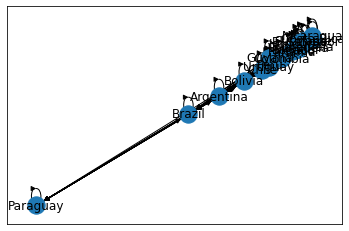

In [ ]:
# Dibujo el grafo de emigraciones

#from torch_geometric.utils import to_networkx
#G_cora = to_networkx(datos_e)

#G_emi = nx.from_pandas_adjacency(datos_e) #no funciona para grafos dirigidos
G_emi = nx.DiGraph(datos_e)
print(G_emi)

# Estadísticas del grafo
cant_nodos = G_emi.number_of_nodes()
cant_vinc = G_emi.number_of_edges()
np.count_nonzero(G_emi) #contamos los valores no nulos en la matriz de adyacencia, es decir da la cantidad de vinculos
print(nx.is_directed(G_emi)) #chequeamos que es dirigido

print(f'Cantidad de nodos: {cant_nodos}')
print(f'Cantidad de aristas: {cant_vinc}')
print(f'Grado promedio de nodo: {(2*cant_vinc) / cant_vinc:.2f}') #chequear como es la formula en grafos dirigidos con pesos (es el nro de aristas??)
#print(f'Tiene nodos aislados: {G_emi.has_isolated_nodes()}')
#print(f'Tiene self-loops: {G_emi.has_self_loops()}')
#print(f'Es no dirigido: {G_emi.is_undirected()}')


# Saco self loops
#G_emi.remove_edges_from(nx.selfloop_edges(G_emi))

# Dibujamos el grafo
nx.draw_networkx(G_emi)
plt.show()

In [ ]:
# Creamos una base auxiliar para modificar los números negativos de la misma por ceros

#from copy import copy
#datos_e2 = copy(datos_e)
datos_e2 = np.copy(datos_e)
datos_e2[datos_e2 < 0] = 0 #cuando el flujo es negativo quiere decir que la cantidad de migrantes en ese país disminuyó entonces se podría decir que no hubo flujo en el período y por ende debería ser cero
                            #de paso elimina los self loops ya que son números negativos

print(type(datos_e2))
datos_e2 = pd.DataFrame(datos_e2, columns = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 
                                             'Ecuador', 'El Salvador', 'Guatemala', 'Guyana', 'Honduras', 'Mexico', 
                                             'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'])
datos_e2 = datos_e2.rename(index = latam)
print(type(datos_e2))

print(datos_e.head())
print(datos_e2.head())

G_emi2 = nx.DiGraph(datos_e2)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
           Argentina  Bolivia  Brazil   Chile  Colombia  Costa Rica  Ecuador  \
Argentina    -388301   192911   15867    7174      5018        -134    -1049   
Bolivia        14602  -479306   10891     343      1623           6      265   
Brazil          6374    24927 -563773     864      3839         213      831   
Chile          10593    42676    8361 -106018     69688           0    13289   
Colombia        1882      287    1636    1627  -1264748         620     4433   

           El Salvador  Guatemala  Guyana  Honduras  Mexico  Nicaragua  \
Argentina          -83       -105       0       -73   -1590        -99   
Bolivia             21          2      -1        35     201         27   
Brazil            -214        183     610        12    1870        -72   
Chile                0          0       0         0    3455          0   
Colombia           271        315       0       237    2029          0   

           P

<ipython-input-11-31e9754f811d>:11: RuntimeWarning: divide by zero encountered in log10
  nx.draw_networkx_edges(G_emi, alpha=0.1, width=np.log10(weights+1), pos=posiciones)
<ipython-input-11-31e9754f811d>:11: RuntimeWarning: invalid value encountered in log10
  nx.draw_networkx_edges(G_emi, alpha=0.1, width=np.log10(weights+1), pos=posiciones)


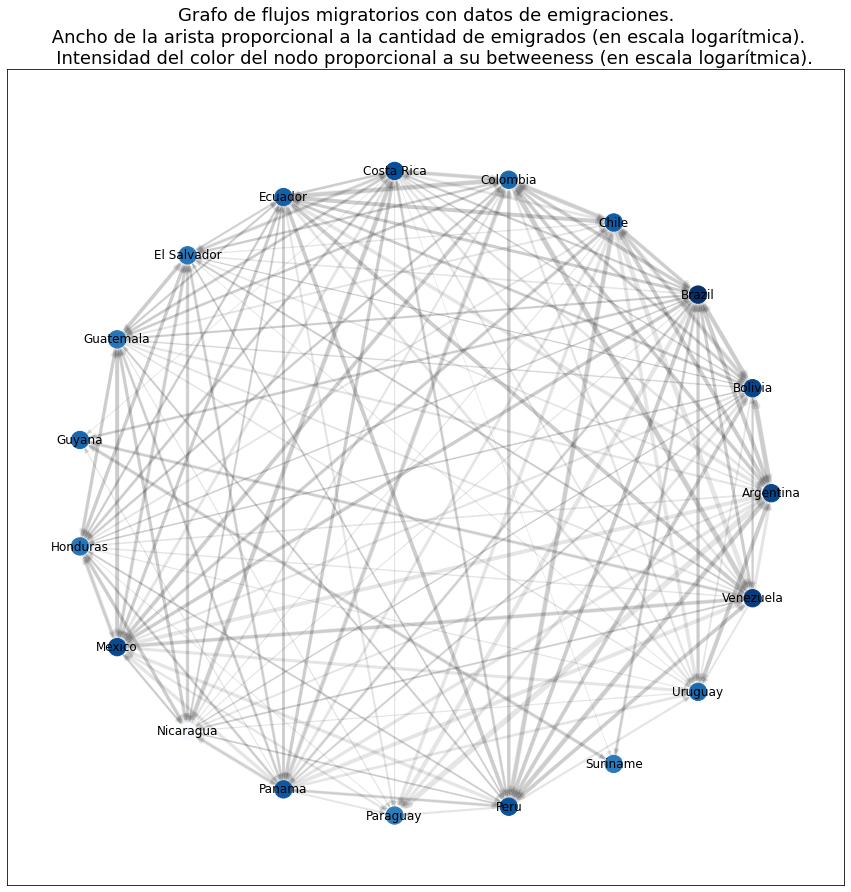

In [ ]:
# Otro gráfico mejor para emigraciones
posiciones = nx.circular_layout(G_emi)
edges = G_emi.edges() #vértices
weights = np.array([G_emi[u][v]['weight'] for u,v in edges])

between_dict = nx.betweenness_centrality(G_emi)
between = np.array(list(between_dict.values()))

plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G_emi, pos=posiciones, node_color=10*np.log(1+between/(np.min(between)+1e-9)), cmap='Blues')
nx.draw_networkx_edges(G_emi, alpha=0.1, width=np.log10(weights+1), pos=posiciones)
nx.draw_networkx_labels(G_emi, pos=posiciones, font_color='black')
plt.title('Grafo de flujos migratorios con datos de emigraciones.\n Ancho de la arista proporcional a la cantidad de emigrados (en escala logarítmica).\n \
  Intensidad del color del nodo proporcional a su betweeness (en escala logarítmica).', fontsize=18)
plt.show()

# Brasil es el nodo con mayor betweeness, lo cual tiene sentido ya que es el pais más grande tanto en superficie como en población dentro de todos los estudiados

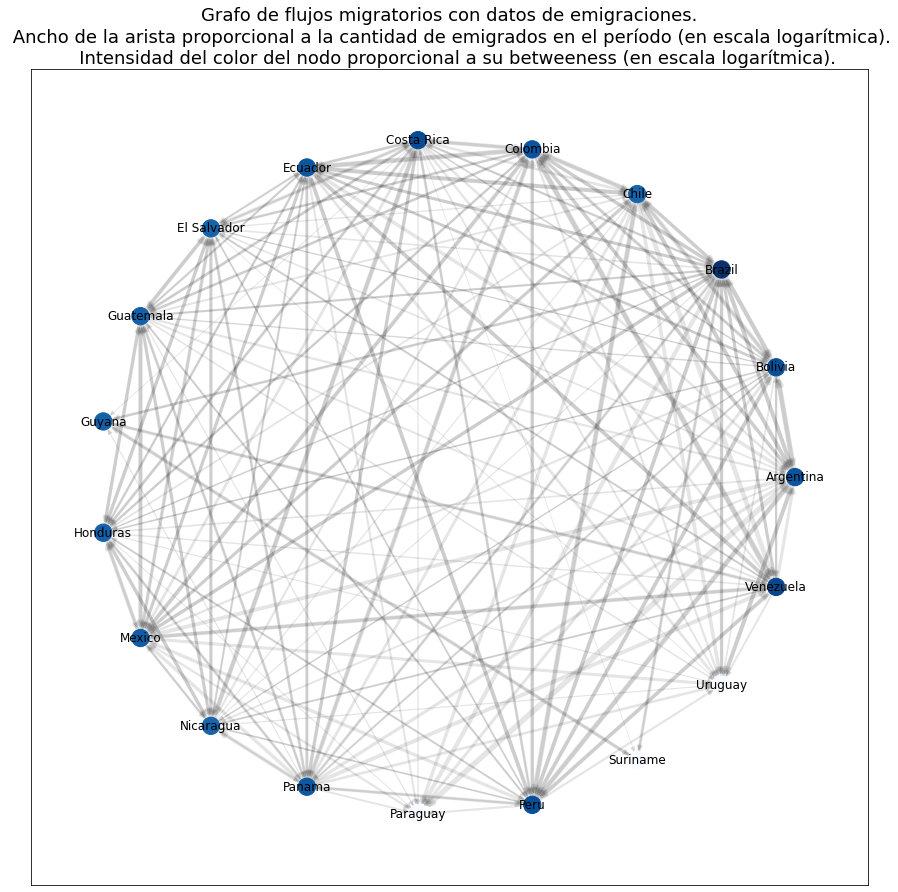

In [ ]:
# Otro gráfico mejor para emigraciones pero con base auxiliar
posiciones = nx.circular_layout(G_emi2)
edges = G_emi2.edges() #vértices
weights = np.array([G_emi2[u][v]['weight'] for u,v in edges])

between_dict = nx.betweenness_centrality(G_emi2)
between = np.array(list(between_dict.values()))

plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G_emi2, pos=posiciones, node_color=10*np.log(1+between/(np.min(between)+1e-9)), cmap='Blues')
nx.draw_networkx_edges(G_emi2, alpha=0.1, width=np.log10(weights+1), pos=posiciones)
nx.draw_networkx_labels(G_emi2, pos=posiciones, font_color='black')
plt.title('Grafo de flujos migratorios con datos de emigraciones.\n Ancho de la arista proporcional a la cantidad de emigrados en el período (en escala logarítmica).\n \
  Intensidad del color del nodo proporcional a su betweeness (en escala logarítmica).', fontsize=18)
plt.show()

# Brasil es el nodo con mayor betweeness, lo cual tiene sentido ya que es el pais más grande tanto en superficie como en población dentro de todos los estudiados

In [ ]:
print(senales.columns.values)
print(type(senales))
print(senales.shape)

['country_name' 'colapsa' 'countrycode' 'v2x_libdem' 'v2julanguage'
 'v2pepwrsoc' 'v2pepwrgen' 'v2peedueq' 'v2pehealth' 'v2peapsecon'
 'v2peasjsoecon' 'v2peasbecon' 'v2clgencl' 'v2peapsgen' 'v2clgeocl'
 'v2peapsgeo' 'v2cafres' 'v2cainsaut' 'v2x_accountability' 'v2x_civlib'
 'v2xcs_ccsi' 'rgdpe' 'rgdpo' 'pop' 'emp' 'avh' 'hc' 'ccon' 'cda' 'cgdpe'
 'cgdpo' 'cn' 'ck' 'ctfp' 'cwtfp' 'rgdpna' 'rconna' 'rdana' 'rnna' 'rkna'
 'rtfpna' 'rwtfpna' 'labsh' 'irr' 'delta' 'xr' 'pl_con' 'pl_da' 'pl_gdpo'
 'cor_exp' 'statcap' 'csh_c' 'csh_i' 'csh_g' 'csh_x' 'csh_m' 'csh_r'
 'pl_c' 'pl_i' 'pl_g' 'pl_x' 'pl_m' 'pl_n' 'pl_k' 'a1' 'a2' 'a3' 'a4' 'a5'
 'a6' 'a7' 'a8' 'a9' 'a10' 'a11' 'a12' 'a13' 'a14' 'a15' 'a16' 'a17' 'a18'
 'a19' 'a20' 'a21' 'a22' 'a23' 'a24' 'a25' 'a26' 'a27' 'a28' 'a29' 'a30'
 'a31' 'a32' 'a33' 'a34' 'a35' 'a36' 'a37' 'a38' 'a39' 'a40' 'a41' 'a42'
 'a43' 'a44' 'a45' 'a46' 'a47' 'a48' 'a49' 'a50' 'a51' 'a52' 'a53' 'a54'
 'a55' 'a56' 'a57' 'a58' 'a59' 'a60' 'a61' 'a62' 'a63' 'a64' 'a65'

In [ ]:
# Matrices para las variables cuya similitud aporta positivamente a que exista un vinculo

democracia = np.array(senales["v2x_libdem"]) #primero queda <class 'pandas.core.series.Series'> y luego <class 'numpy.ndarray'>
#democracia = senales.loc[['v2x_libdem']] #no funca
print(type(democracia))

pe_democracia = np.outer(democracia, democracia) #producto externo de dos array
#pe_democracia = democracia * (democracia.T)
#print(pe_democracia)
print(type(pe_democracia))
print(pe_democracia.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(19, 19)


In [ ]:
# Correlación entre matrices vectorizadas
np.ravel(pe_democracia, order='T')
#Para calcular la correlación entre dos variables en Python, podemos usar la función Numpy corrcoef()

ValueError: ignored

In [ ]:
# Matrices para las variables cuya similitud aporta negativamente a que exista un vinculo
ver
https://numpy.org/doc/stable/reference/generated/numpy.repeat.html

In [ ]:
gini = np.array(senales["a54"])
gini_m = np.repeat(gini, 19)
#gini_m = [gini,gini,gini]
gini_m

array([46.42      , 46.42      , 46.42      , 46.42      , 46.42      ,
       46.42      , 46.42      , 46.42      , 46.42      , 46.42      ,
       46.42      , 46.42      , 46.42      , 46.42      , 46.42      ,
       46.42      , 46.42      , 46.42      , 46.42      , 52.7       ,
       52.7       , 52.7       , 52.7       , 52.7       , 52.7       ,
       52.7       , 52.7       , 52.7       , 52.7       , 52.7       ,
       52.7       , 52.7       , 52.7       , 52.7       , 52.7       ,
       52.7       , 52.7       , 52.7       , 54.85714286, 54.85714286,
       54.85714286, 54.85714286, 54.85714286, 54.85714286, 54.85714286,
       54.85714286, 54.85714286, 54.85714286, 54.85714286, 54.85714286,
       54.85714286, 54.85714286, 54.85714286, 54.85714286, 54.85714286,
       54.85714286, 54.85714286, 47.82857143, 47.82857143, 47.82857143,
       47.82857143, 47.82857143, 47.82857143, 47.82857143, 47.82857143,
       47.82857143, 47.82857143, 47.82857143, 47.82857143, 47.82

In [ ]:
print(senales)
X = np.copy(senales)
print(type(X))
#del X["country_name", "colapsa", "countrycode"]
X = X[:, 3:137]
print(type(X))

   country_name    colapsa countrycode  v2x_libdem  v2julanguage  v2pepwrsoc  \
0     Argentina  2000-2015         ARG    0.615437           NaN    1.457937   
1       Bolivia  2000-2015         BOL    0.463438      2.000000    0.725812   
2        Brazil  2000-2015         BRA    0.751875     50.142857    1.510875   
3         Chile  2000-2015         CHL    0.827875      1.818182    0.916687   
4      Colombia  2000-2015         COL    0.468937      1.600000    0.243563   
5    Costa Rica  2000-2015         CRI    0.841812      2.800000    2.364438   
6       Ecuador  2000-2015         ECU    0.412250      2.000000    0.787938   
7   El Salvador  2000-2015         SLV    0.380812      1.750000    1.044312   
8     Guatemala  2000-2015         GTM    0.390375           NaN   -0.936438   
9        Guyana  2000-2015         GUY    0.405000      1.000000   -0.619500   
10     Honduras  2000-2015         HND    0.263125      3.400000    0.310750   
11       Mexico  2000-2015         MEX  